General Analysis
===================

This is a series of notebooks used in my research of a literature review on the Iterated Prisoner's Dilemma. In the previous sections *(have not been writen yet)*, a timeline analysis was described for the work of various authors on the topic. 

Here we will start a new section of this article which contains the data analysis of a data set which contains metadata of academic articles on the research topic.

Academic articles leave on scholarly databases and collections, which can be found and acessed in the world wide web (www). Accessing www and collecting data has once been a manual procuder. Fortunately, we often found oursleves automating such procuders. Indeed some one did. APIs is a application protocol interface is a set of routines, protocols, and tools that in our example allow us to ping directly the data base behind the web side of a journal. The are various journals that leave on the www and a number of them allow you to make requests to their databases using open APIs. 

In order to request and receive a answer from an academics journal API there are various steps one has to take. For each:

- make a request (different syntax)
- get answer (different format).

In our work we have been looking to work with not only a single journal. This has inspired us to create an open source python library called Arcas to serve as a translator between the user and various APIs. Thus Arcas is a tool to talk to different APIs in the own launguage and return to the user answers of the same format. Arcas code and tutorials can be found here: https://github.com/Nikoleta-v3/Arcas.

Once Arcas was usable as tools the data have been collected. In order to collect the data a list of keywords chosen by us had to used in the search field. This list contains the following words: prisoner’s dilemma, prisoners evolution, prisoner dilemma, prisoner game theory, Axelrod, memory one strategy, TFT, tit for tat, tit-for-tat and zero determinant. 

In this notebook:

- 1. General Analysis

A general analysis describing the data set is carried out. 

In [1]:
import pandas as pd
import numpy as np

The open source python library pandas (http://pandas.pydata.org/) will be used through out this article for the analysis.

In [2]:
df = pd.read_json('../data/data_nov_2017.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 0 to 9999
Data columns (total 14 columns):
abstract           11273 non-null object
author             11273 non-null object
date               11273 non-null int64
journal            11273 non-null object
key                11273 non-null object
key_word           11273 non-null object
labels             11273 non-null object
list_strategies    11273 non-null object
pages              11273 non-null object
provenance         11273 non-null object
read               11273 non-null object
score              11273 non-null object
title              11273 non-null object
unique_key         11273 non-null object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


Pandas info function shows us the information of the data set itself. 

We can see that the sata set contains the following columns:
- Abstract. The abstract of the article.
- Author. A single entity of an author from the list of authors of the respective article.
- Date. Date of publication.
- Journal. Journal of publication. 
- Key. A generated key containing an authors name and publication year (ex. Glynatsi2017).                
- Key_word. A signle entity of a keyword assigned to the article by the given journal.
- Labels. A single entity of labels assigned to the article manual by us.                 
- Pages. Pages of publication.              
- Provenance. Scholarly database for where the article was collected.                 
- Score. Score given to article by the given journal.              
- Title. Title of article.              
- Unique key.  A unique key generated using the hashlib python library (https://docs.python.org/2/library/hashlib.html). The hashable string is created by: [author name, title, year,abstract]


The data set also contains the columns list of strategies and read. But they will be drop for this analysis.

In [4]:
df = df.drop(['read', 'list_strategies'], 1)

In [5]:
df.describe()

,date
count,11273.000000
mean,2009.844496
std,5.631504
min,1944.000000
25%,2007.000000
50%,2010.000000
75%,2013.000000
max,2017.000000


Using the describe function of pandas we can see that there are in total 11078 rows of data
in our data set. Only date is displayed because is the only integer value in the data set. 
The min year is 1961 and the max 2017. 

In [6]:
len(df['unique_key'].unique())

1168

Looking at the unique keys we see that there are in total 1104 unique articles in the data set.

In [7]:
df = df.replace('None', np.nan)

Provenance
----------

The total number of articles is given above. Here we can illustrate the provenance of these articles.
Thus we can see from which journal they have been collected and how many articles have been added by us. The table below shows the number of articles for each provenance.

In [8]:
prov = df.groupby(['unique_key', 'provenance']).size().reset_index().groupby('provenance').size()

In [9]:
pd.DataFrame(prov).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &    0 \\\\\nprovenance &      \\\\\n\\midrule\nIEEE       &  253 \\\\\nManual     &   40 \\\\\nNature     &   25 \\\\\nPLOS       &   63 \\\\\nSpringer   &  317 \\\\\narXiv      &  470 \\\\\n\\bottomrule\n\\end{tabular}\n'

As mentioned before not all results from each API have the same format and same information. For example keywords our only given by IEEE and nature. Furthermore not all journals had full information for specific articles. 

Here we will look at the percentage of coverage of each column. *(put better in words)*

In [10]:
temp = df.drop_duplicates('unique_key')
for col in df.columns:
    
    perc = len(temp[col].dropna()) / len(temp)
    perc *= 100
    print(col, ":", perc)

abstract : 97.51712328767124
author : 100.0
date : 100.0
journal : 99.48630136986301
key : 100.0
key_word : 22.174657534246574
labels : 9.332191780821917
pages : 24.82876712328767
provenance : 100.0
score : 6.25
title : 100.0
unique_key : 100.0


We can see on the table above that the coverage in percentage of each column for 
unique articles.

# 2. Key words
The most used key words

Before analysing the key words all must be lower case.

In [13]:
df.key_word = df.key_word.str.lower()

In [14]:
len(df[df.key_word.notnull()].groupby('unique_key').size())

242

In [30]:
key_freq = df.groupby(['unique_key', 'key_word']).size().reset_index().groupby('key_word').size().order(ascending=False)[:30]
key_freq = key_freq.keys()

/home/nightwing/anaconda3/envs/spacy/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Irrelevant key words: 
---------------------

There is a list of words that are irrelevant with the PD and the articles themselves. *note: Key words come from IEEE and Nature only.* 
Such as:
- Thin Film Transistors
- Toy industry
- Elements (Helium, Gold, Nickel, Manganese)
- Mirrors
- Bishmuth

After a bit of searching I believe IEEE uses a kind of nature launguage process for it keywords. 
For examples:

- Thin film Transistors: http://ieeexplore.ieee.org/document/725486/. Though neither in the title or abstract the key word makes no sense, in the article the word TFT is continuously repeated. 
- Helium: http://ieeexplore.ieee.org/document/5333456/. Because the words 'EEG' and 'Helium' are often studied together


None: 
-----

Just by reading abstracts I have manually filled in a few labels fields. 
If natural language process allow us to match titles-abstract with labels we created most work done by key words can be replaced by labels and the amount of none should not affect us.

# 3. Labels
As an example. We are not there yet with the labels.

In [16]:
df.groupby(['unique_key', 'labels']).size().reset_index().groupby('labels').size().order(ascending=False)

/home/nightwing/anaconda3/envs/spacy/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


labels
evolutionary dynamics              20
social                             14
clusters                            7
spatial                             7
memory                              6
zero determinant                    5
decision making                     5
fingerprinting                      5
reinforcement learning              4
neural networks                     4
newcomb problem                     3
finite state machines               3
genetic algorithms                  3
wireless networks                   3
new strategy                        3
P2P networks                        3
tit for tat                         3
square lattice                      3
noise                               2
sex                                 2
chicken games                       2
controlled matching                 2
information sharing                 2
markov processes                    2
game representation                 2
memory one strategy                 2
scale

# 4. Titles

While looking at the db words in the titles such as:

- social
- spatial
- network
- evolution
- decision
- newcomb
- noise

did stand out. 

In [7]:
# lets try to use spacy
#import spacy
import pandas as pd

from collections import Counter, defaultdict

from matplotlib.pyplot import hist
from cycler import cycler

In [10]:
import spacy
nlp = spacy.load('en')

In [11]:
all_title = ''
for title in df.title.str.lower().unique():
    all_title += '\n {}'.format(title)

In [12]:
doc = nlp(all_title)

In [19]:
def find_words_occurences(doc):
    keywords = Counter()
    for token in doc:
        if token.pos_ == 'NOUN':
            keywords[token.lemma_] += 1
    #for token in keywords:
    #    print('{} - {}'.format(token, token.prob))
    return keywords.most_common()

In [20]:
find_words_occurences(doc)

[('dilemma', 610),
 ('prisoner', 577),
 ('game', 361),
 ('cooperation', 230),
 ('strategy', 142),
 ('network', 128),
 ('evolution', 84),
 ('tit', 62),
 ('model', 55),
 ('tat', 48),
 ('agent', 45),
 ('effect', 44),
 ('memory', 40),
 ('behavior', 37),
 ('theory', 36),
 ('dynamic', 36),
 ('group', 35),
 ('emergence', 32),
 ('analysis', 31),
 ('structure', 28),
 ('population', 27),
 ('player', 26),
 ('interaction', 26),
 ('representation', 23),
 ('problem', 22),
 ('system', 22),
 ('solution', 19),
 ('simulation', 19),
 ('payoff', 18),
 ('approach', 18),
 ('study', 18),
 ('selection', 18),
 ('equilibrium', 17),
 ('decision', 17),
 ('learning', 17),
 ('reciprocity', 17),
 ('graph', 16),
 ('lattice', 16),
 ('algorithm', 16),
 ('information', 16),
 ('scale', 16),
 ('application', 16),
 ('role', 15),
 ('person', 15),
 ('automaton', 13),
 ('choice', 13),
 ('experiment', 13),
 ('determinant', 12),
 ('punishment', 12),
 ('diversity', 12),
 ('time', 12),
 ('action', 12),
 ('self', 12),
 ('size', 12

# 5. Authors

In [21]:
len(df.author.unique())

1759

In [19]:
df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size().order(ascending=False)

/home/nightwing/anaconda3/envs/spacy/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


author
matjaz perc                 27
attila szolnoki             25
long wang                   17
gyorgy szabo                15
daniel ashlock              14
zhen wang                   13
zhi-xi wu                   11
angel sánchez               11
hisao ishibuchi             10
xiaojie chen                10
zhihai rong                 10
dirk helbing                 9
krishnendu chatterjee        9
yusuke nojima                9
jeffrey tsang                9
azhar iqbal                  9
josé a. cuesta               8
j. gomez-gardenes            7
martin a. nowak              7
y. moreno                    7
feng fu                      7
derek abbott                 7
jiawei li                    6
eun-youn kim                 6
yamir moreno                 6
valerio capraro              6
naoki masuda                 6
jeromos vukov                6
takahiko sudo                6
alexandre souto martinez     5
                            ..
oechssler  jörg              1
n

We can also look at Authors and key words. This can show us whether an author jumped field or even 
indintify topics within the IPD which are strongly related.


In [20]:
authors_field =df[df['key_word'] != 'none'].groupby(['unique_key', 'author', 'date', 'key_word']).size().reset_index().groupby(['author', 'date', 'key_word']).size()

# 7. Trends

Are seperated as:

- Key words with articles per year

- Lables with articles per year

- Author with articles per year

# 7.1 Key words

In [24]:
key_word_freq = df[df['key_word'].isin(key_freq)].groupby(['key_word', 'date']).size()
len(key_freq)

30

In [25]:
years = list(range(1990, 2018))
labels = [str(x) for x in years]

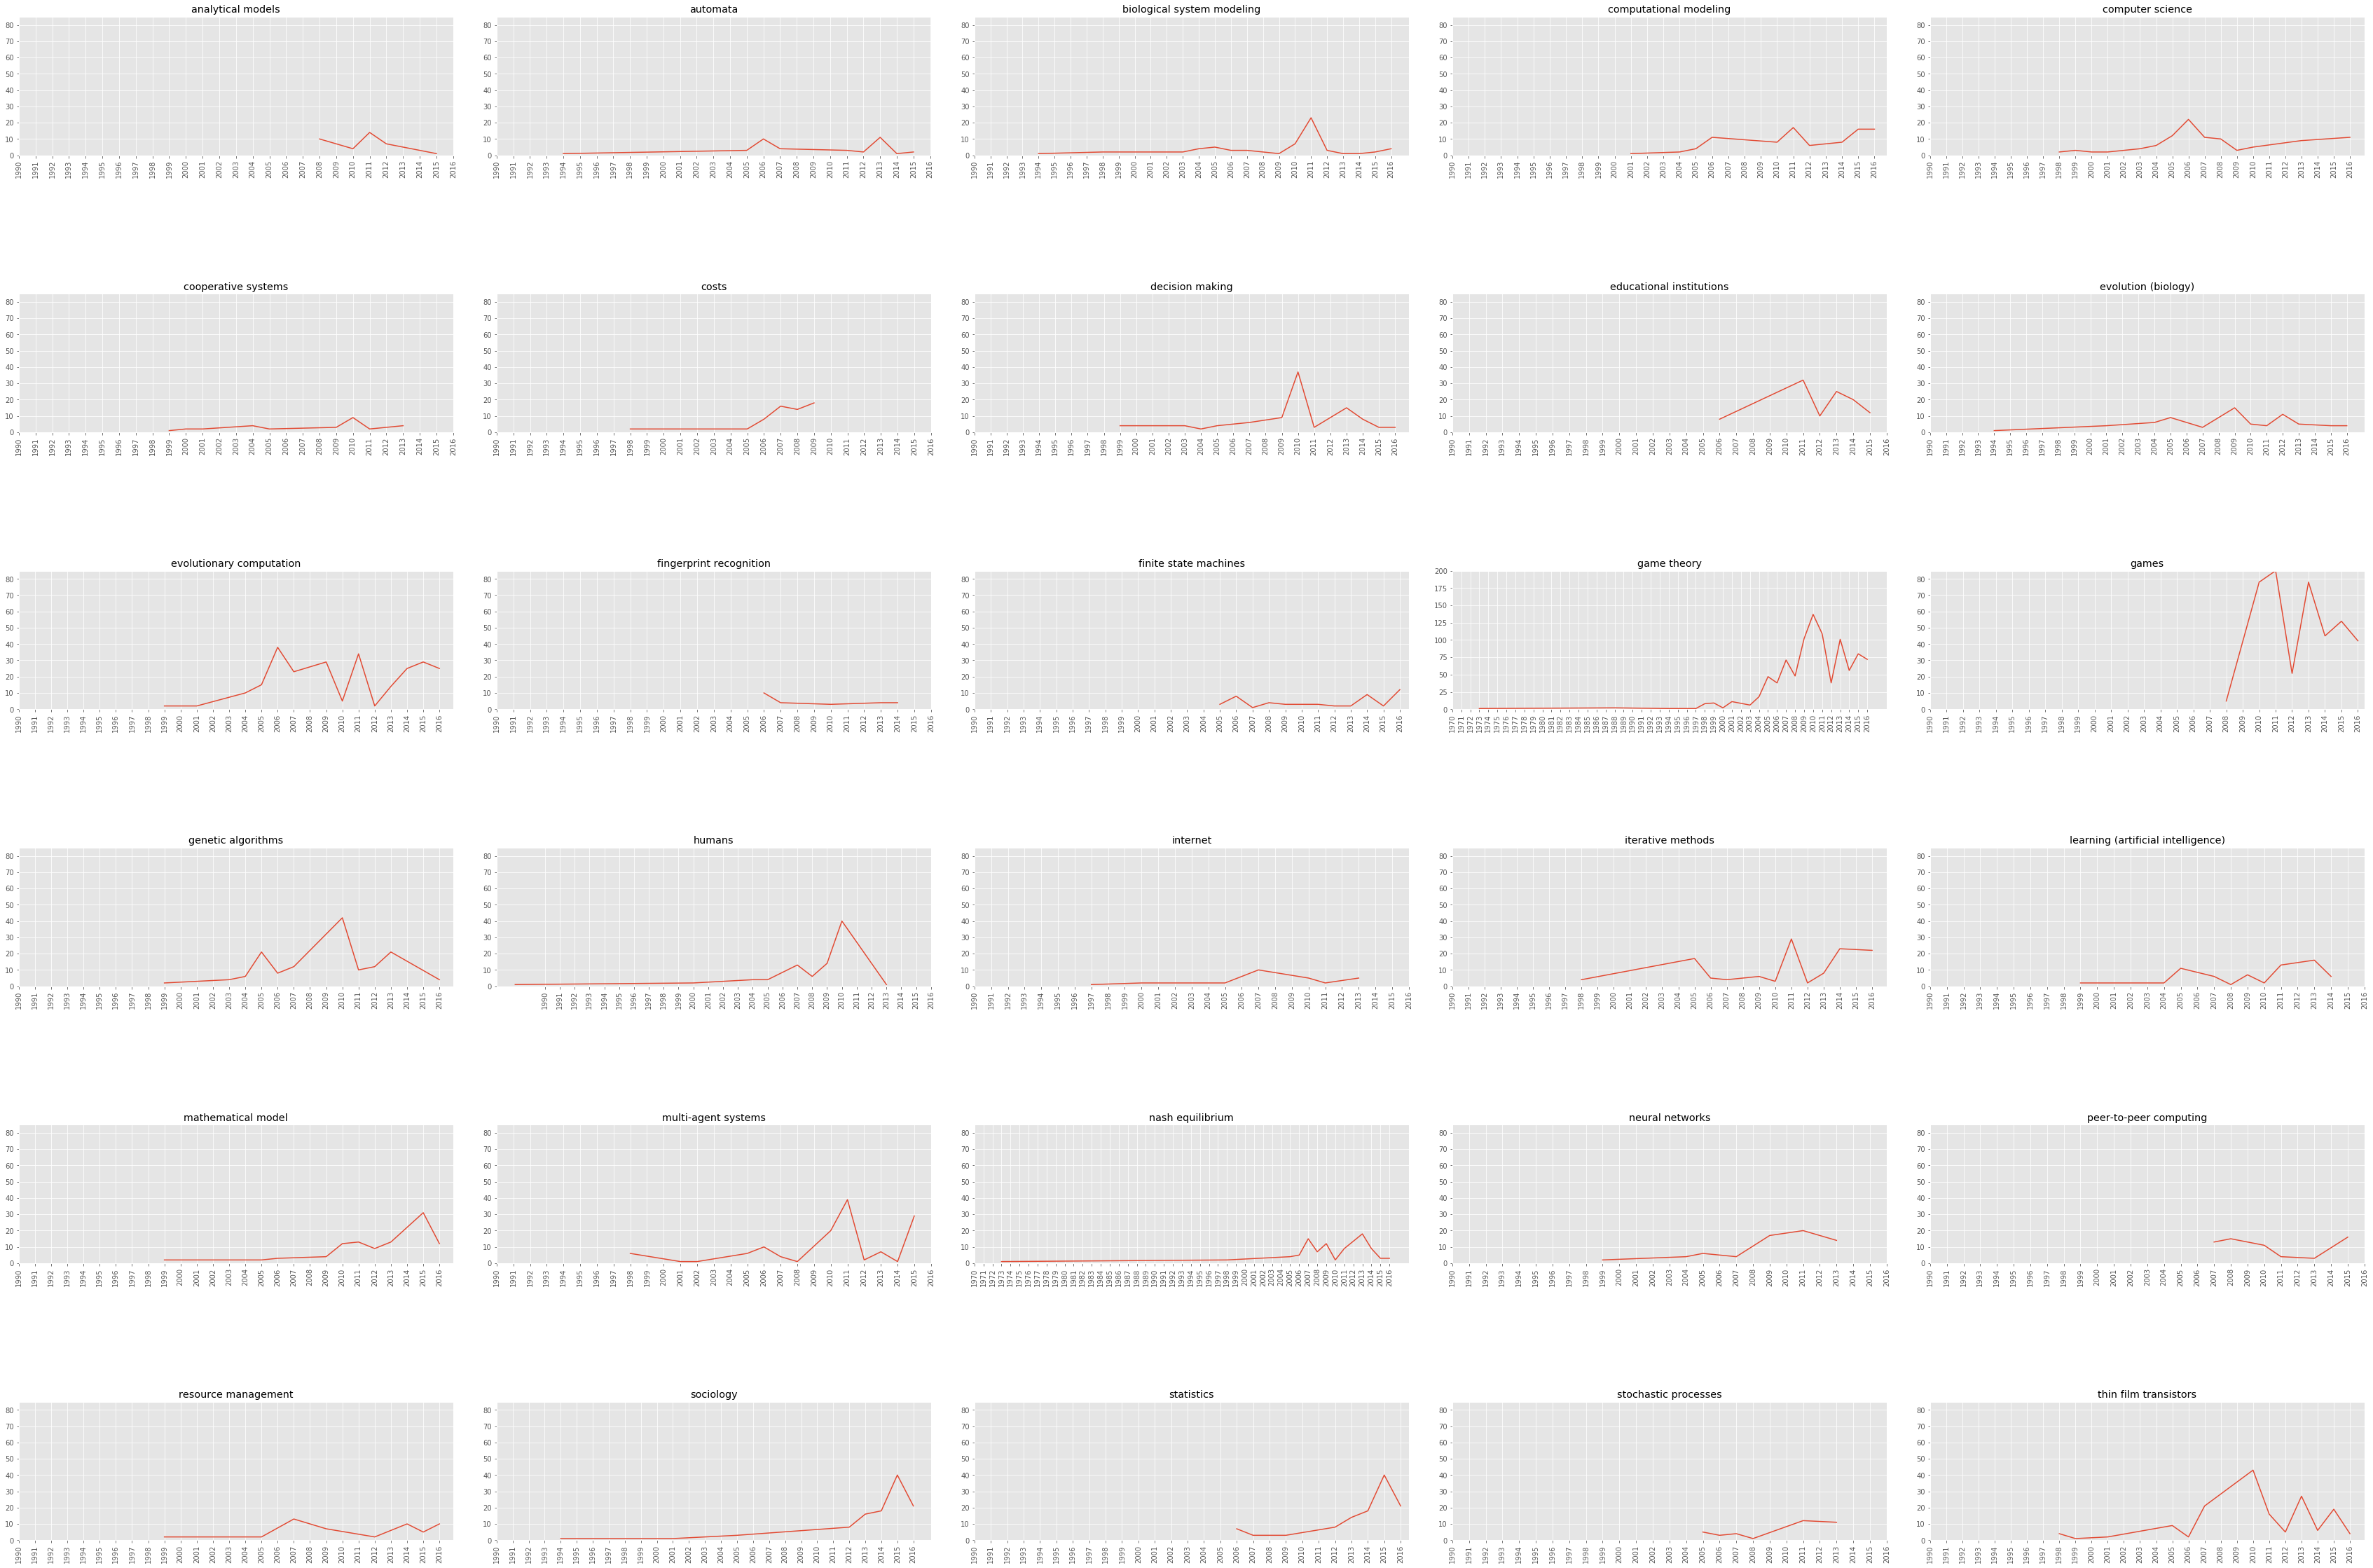

In [32]:
fig, axs = plt.subplots(6, 5, figsize=(60, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 0

for groupID, data in key_word_freq.groupby(level='key_word'):

    axs[i].plot(data.index.get_level_values('date'), data.values.ravel())
    if groupID == 'game theory':
        axs[i].set_ylim(0, 200)
        axs[i].set_xticks(range(1970, 2017))
        axs[i].set_xticklabels(range(1970, 2017), rotation=90)
    elif groupID == 'nash equilibrium':
        axs[i].set_ylim(0, 85)
        axs[i].set_xticks(range(1970, 2017))
        axs[i].set_xticklabels(range(1970, 2017), rotation=90)
    else:
        axs[i].set_xticks(range(1990, 2017))
        axs[i].set_xticklabels(range(1990, 2017), rotation=90)
        axs[i].set_ylim(0, 85)
    
    axs[i].set_title('{}'.format(groupID))
    i += 1
    
    plt.savefig("/home/nightwing/rsc/Literature-Article/src/img/keywords.pdf", format='pdf', bbox_inches='tight')

# 7.2 Labels

Again labels will have more to say once the natural language process does the matching. 

In [22]:
labels_trend =df.groupby(['unique_key', 'labels', 'date']).size().reset_index().groupby(['labels', 'date']).size()
labels_trend = pd.DataFrame(labels_trend)

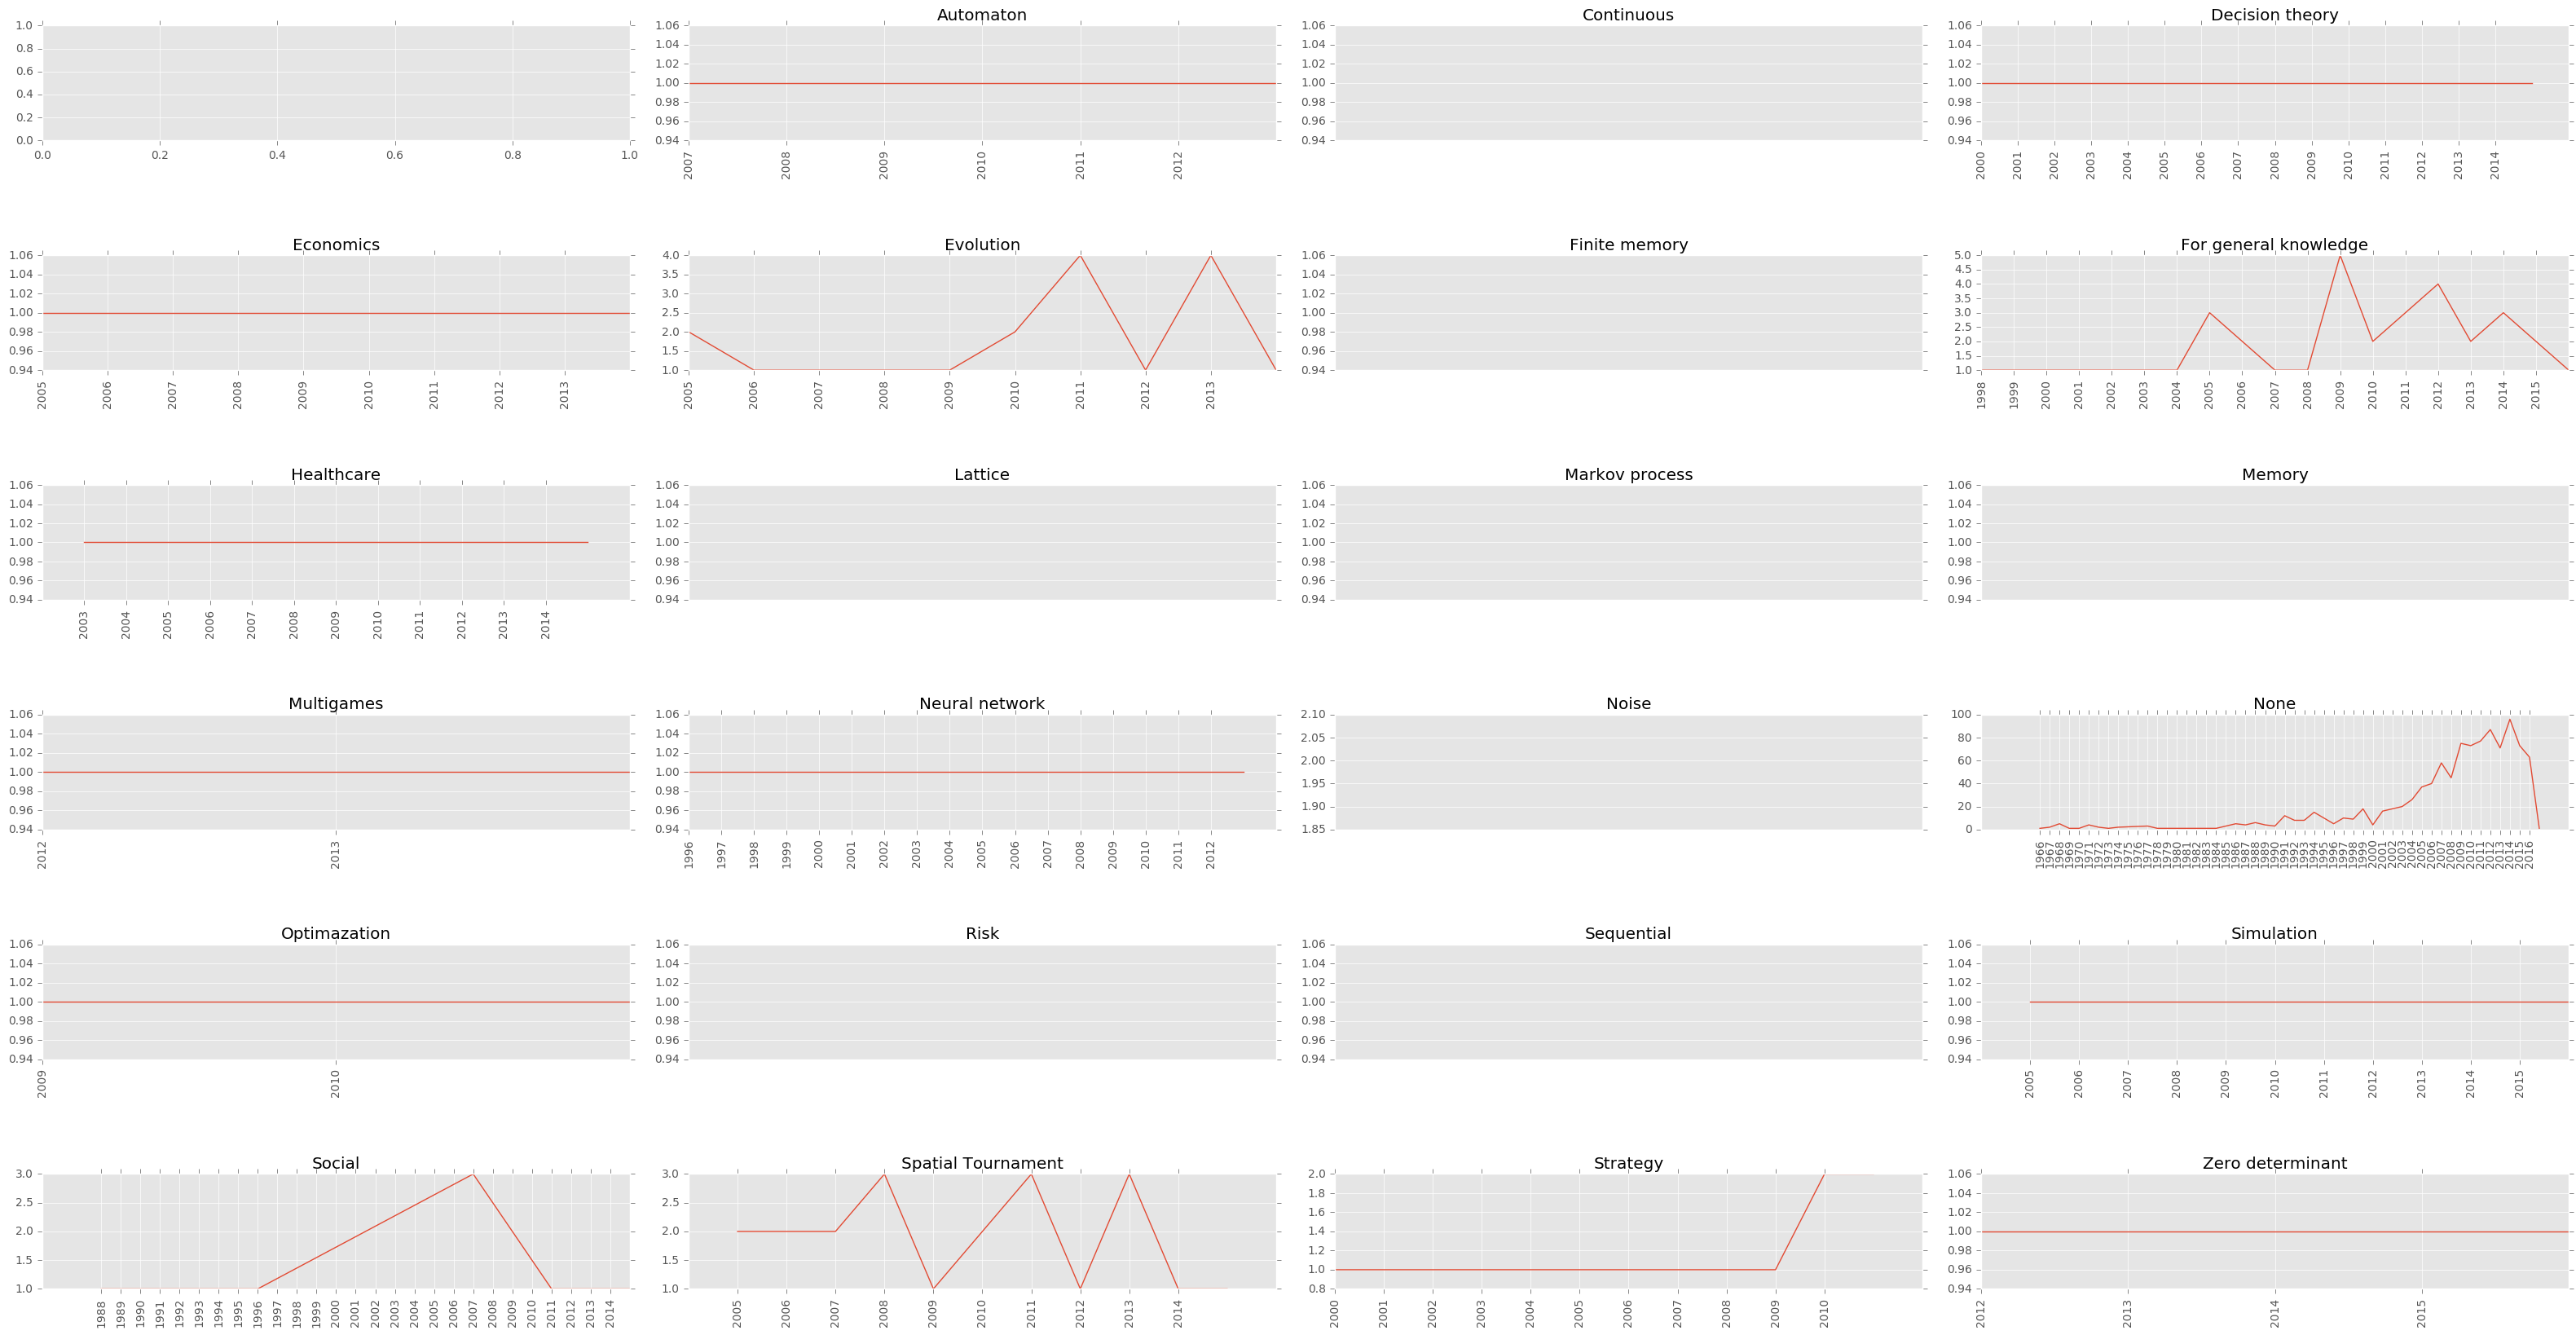

In [23]:
fig, axs = plt.subplots(6,4, figsize=(40, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.1)

axs = axs.ravel()
i = 1

for groupID, data in labels_trend.groupby(level='labels'):

    axs[i].plot(data.index.get_level_values('date'), data.values.ravel())
    dates = data.index.get_level_values('date')
    axs[i].set_xticks(range(dates.min(), dates.max()))
    axs[i].set_xticklabels(range(dates.min(), dates.max()), rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1
    

# 7.3 Authors

Authors with number of article can show us the productivity of an author.

**Note** that the following example is only for the most activate authors within the db. This can be expand
to all the authors.

In [93]:
authors_freq = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()
more_one = authors_freq[authors_freq >= 5].keys()
authors_prod =df[df['author'].isin(more_one)].groupby(['unique_key', 'author', 'date']).size().reset_index().groupby(['author', 'date']).size()
authors_prod = pd.DataFrame(authors_prod)

In [94]:
len(more_one)

43

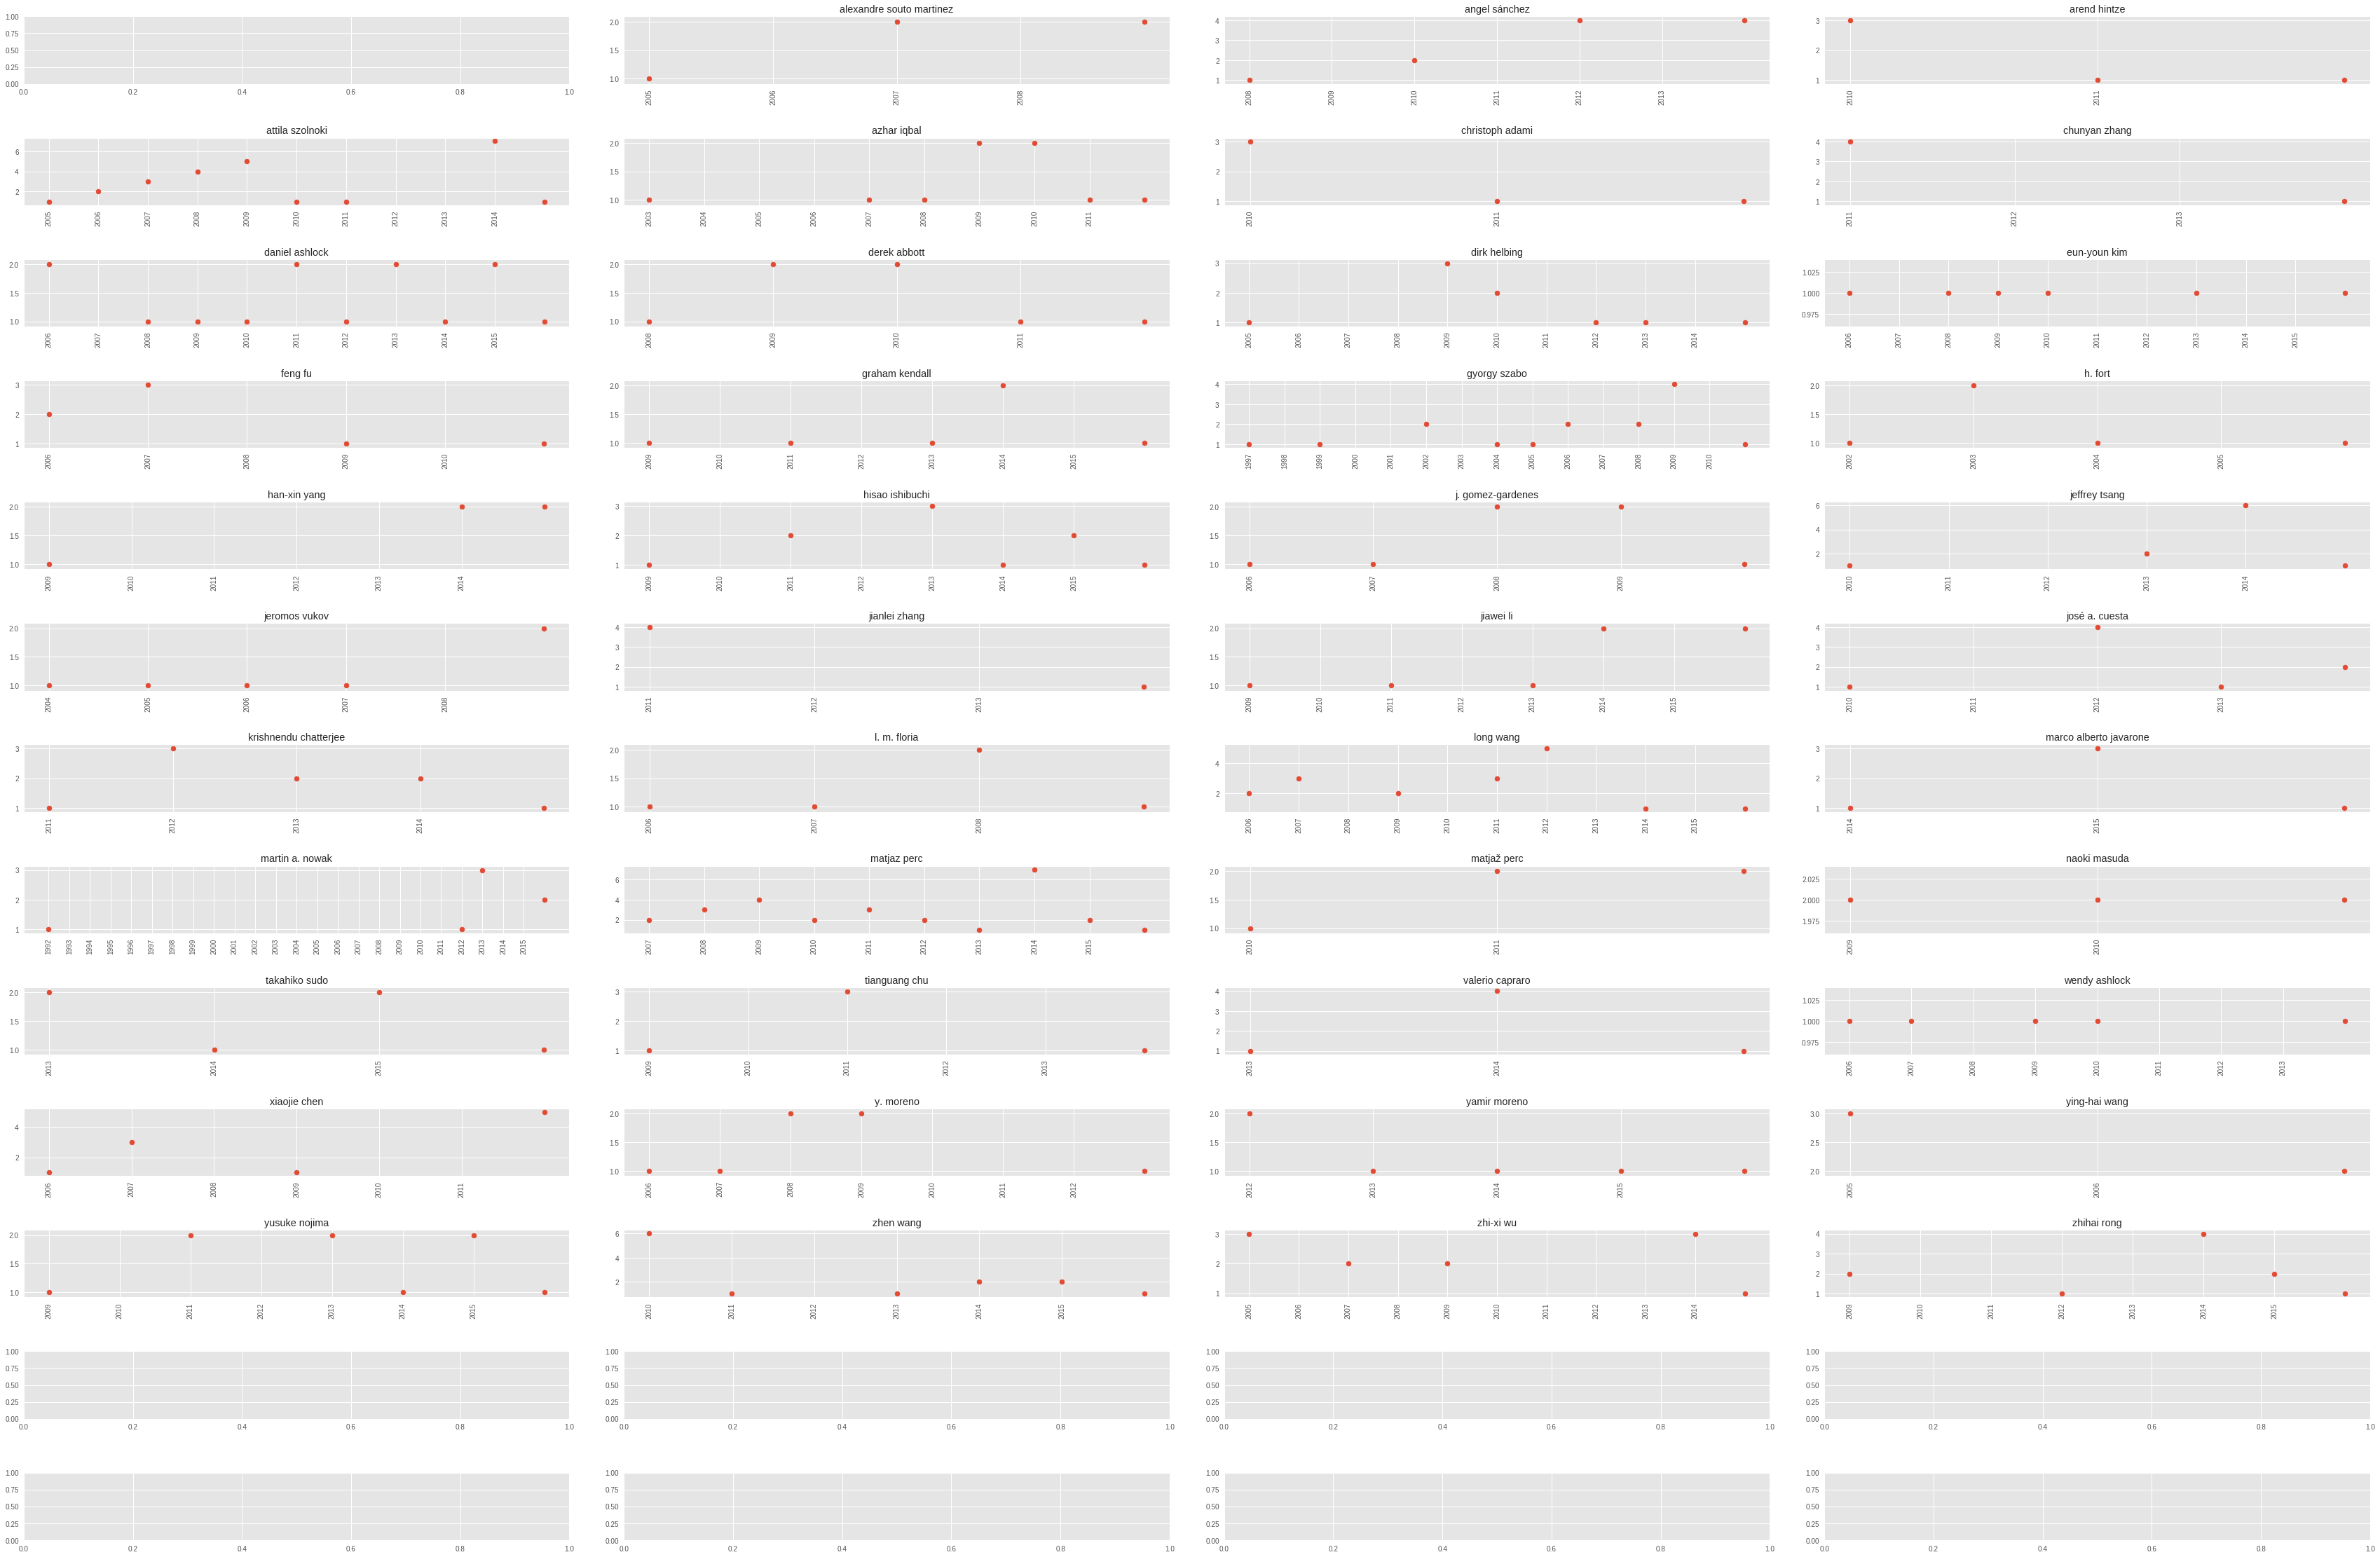

In [95]:
fig, axs = plt.subplots(13,4, figsize=(60, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.8, wspace=.1)
axs = axs.ravel()
i = 1

for groupID, data in authors_prod.groupby(level='author'):
    
    x = data.index.get_level_values('date')
    y = data.values.ravel()
    axs[i].scatter(x, y)
    axs[i].set_yticks = y
    axs[i].set_xticks(range(x.min(), x.max()))
    axs[i].set_xticklabels(range(x.min(), x.max()), rotation=90)
    axs[i].set_title('{}'.format(groupID))
    i += 1